# Extract data from txt file

In [1]:
import csv

In [2]:
# Extension
stations = ['1096710','1096310','1007410','1021310','1021410','1021510','1016610','1027410','10115310','1022010','1022210']

with open('00Extension.csv', 'w') as new_file:
    csv_writer = csv.writer(new_file)
    
    for i in range(14,29):
        with open('DataSet/Traffic/2_Weeks_Extention/d10_text_station_5min_2019_02_{}.txt'.
                  format(str(i).zfill(2)), 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
    
            for line in csv_reader:
                if line[1] in stations:
                    csv_writer.writerow(line)

# Process dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read saved csv file
Ext  = pd.read_csv('00Extension.csv',header=None)

In [5]:
# Trim the data (first 17 columns)
Ext = Ext.iloc[:,0:17]

In [6]:
# Define dataframe header
columns = ['Timestamp','Station','District','Freeway','DoT','Lane Type','Station Length','Samples', '% Obs',
          'Total flow','Avg Occ','Ave Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ','Lane N Avg Speed','Lane N obs']

In [7]:
# Input the header defined above
Ext.columns = columns

In [8]:
Ext.head()

,Timestamp,Station,District,Freeway,DoT,Lane Type,Station Length,Samples,% Obs,Total flow,Avg Occ,Ave Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N obs
0,02/14/2019 00:00:00,1007410,10,5,N,ML,0.501,32,100,88.0,0.0198,72.0,8.0,24.0,0.0145,75.9,1
1,02/14/2019 00:00:00,1016610,10,5,N,ML,0.612,24,100,84.0,0.0187,70.7,8.0,21.0,0.0111,74.8,1
2,02/14/2019 00:00:00,1021310,10,5,N,ML,0.726,24,67,99.0,0.0274,68.2,8.0,39.0,0.0194,72.5,1
3,02/14/2019 00:00:00,1021410,10,5,N,ML,0.487,0,0,94.0,0.0288,65.5,0.0,33.0,0.0217,70.3,0
4,02/14/2019 00:00:00,1021510,10,5,N,ML,0.450,0,0,87.0,0.0265,66.0,0.0,32.0,0.0205,70.6,0


In [9]:
Ext.tail()

,Timestamp,Station,District,Freeway,DoT,Lane Type,Station Length,Samples,% Obs,Total flow,Avg Occ,Ave Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N obs
47515,02/28/2019 23:55:00,1022210,10,5,N,ML,1.497,0,0,7.0,0.0030,68.3,0.0,2.0,0.0021,71.9,0
47516,02/28/2019 23:55:00,1027410,10,5,N,ML,0.249,0,0,73.0,0.0235,65.4,0.0,38.0,0.0242,68.2,0
47517,02/28/2019 23:55:00,1096310,10,5,N,ML,0.669,30,100,117.0,0.0376,65.1,10.0,31.0,0.0170,71.9,1
47518,02/28/2019 23:55:00,1096710,10,5,N,ML,0.249,15,100,102.0,0.0310,67.5,5.0,20.0,0.0122,71.7,1
47519,02/28/2019 23:55:00,10115310,10,5,N,ML,0.730,18,100,58.0,0.0136,66.8,6.0,3.0,0.0017,71.7,1


In [10]:
len(Ext)

47520

In [11]:
# Pass a list of column names (the important variables)
Ext = Ext[['Timestamp','Station','Total flow']]

In [12]:
# Replace Station ID
mymap = {
            1096710  : 'f1',
            1096310  : 'f2',
            1007410  : 'f3',
            1021310  : 'f4',
            1021410  : 'f5',
            1021510  : 'f6',
            1016610  : 'f7',
            1027410  : 'f8',
            10115310 : 'f9',
            1022010  : 'f10',
            1022210  : 'f11'
        }
Ext['Station'] = Ext['Station'].map(mymap)

In [13]:
Ext['Station'].value_counts()

f8     4320
f6     4320
f9     4320
f3     4320
f4     4320
f7     4320
f10    4320
f11    4320
f1     4320
f2     4320
f5     4320
Name: Station, dtype: int64

In [14]:
Ext['Timestamp'].nunique()

4320

In [15]:
# Re-arrange the Dataframe to spatio-temporal format
Ext = Ext.pivot(index='Timestamp',columns='Station',values='Total flow')

In [16]:
Ext.keys()

Index(['f1', 'f10', 'f11', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9'], dtype='object', name='Station')

In [17]:
# f11 is incomplete so drop it
Ext.drop(columns = ['f4','f5','f8','f11'], inplace = True)

In [18]:
Ext

Station,f1,f10,f2,f3,f6,f7,f9
Timestamp,,,,,,,
02/14/2019 00:00:00,89.0,66.0,91.0,88.0,87.0,84.0,53.0
02/14/2019 00:05:00,87.0,82.0,100.0,125.0,97.0,101.0,60.0
02/14/2019 00:10:00,88.0,81.0,86.0,96.0,99.0,105.0,64.0
02/14/2019 00:15:00,82.0,58.0,80.0,89.0,86.0,86.0,42.0
02/14/2019 00:20:00,56.0,62.0,78.0,84.0,94.0,77.0,46.0
...,...,...,...,...,...,...,...
02/28/2019 23:35:00,110.0,69.0,110.0,86.0,89.0,101.0,86.0
02/28/2019 23:40:00,136.0,69.0,118.0,130.0,106.0,104.0,76.0
02/28/2019 23:45:00,113.0,83.0,107.0,124.0,96.0,112.0,87.0


In [19]:
# Re-arrange spatial columns, so, the data is sequential
Ext = Ext[['f1','f2','f3','f6','f7','f9','f10']]
Ext

Station,f1,f2,f3,f6,f7,f9,f10
Timestamp,,,,,,,
02/14/2019 00:00:00,89.0,91.0,88.0,87.0,84.0,53.0,66.0
02/14/2019 00:05:00,87.0,100.0,125.0,97.0,101.0,60.0,82.0
02/14/2019 00:10:00,88.0,86.0,96.0,99.0,105.0,64.0,81.0
02/14/2019 00:15:00,82.0,80.0,89.0,86.0,86.0,42.0,58.0
02/14/2019 00:20:00,56.0,78.0,84.0,94.0,77.0,46.0,62.0
...,...,...,...,...,...,...,...
02/28/2019 23:35:00,110.0,110.0,86.0,89.0,101.0,86.0,69.0
02/28/2019 23:40:00,136.0,118.0,130.0,106.0,104.0,76.0,69.0
02/28/2019 23:45:00,113.0,107.0,124.0,96.0,112.0,87.0,83.0


In [20]:
columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
Ext.columns = columns

In [21]:
Ext

,f1,f2,f3,f4,f5,f6,f7
Timestamp,,,,,,,
02/14/2019 00:00:00,89.0,91.0,88.0,87.0,84.0,53.0,66.0
02/14/2019 00:05:00,87.0,100.0,125.0,97.0,101.0,60.0,82.0
02/14/2019 00:10:00,88.0,86.0,96.0,99.0,105.0,64.0,81.0
02/14/2019 00:15:00,82.0,80.0,89.0,86.0,86.0,42.0,58.0
02/14/2019 00:20:00,56.0,78.0,84.0,94.0,77.0,46.0,62.0
...,...,...,...,...,...,...,...
02/28/2019 23:35:00,110.0,110.0,86.0,89.0,101.0,86.0,69.0
02/28/2019 23:40:00,136.0,118.0,130.0,106.0,104.0,76.0,69.0
02/28/2019 23:45:00,113.0,107.0,124.0,96.0,112.0,87.0,83.0


In [22]:
type(Ext.index)

pandas.core.indexes.base.Index

# Data Preprocessing II 
## Dataset integrity

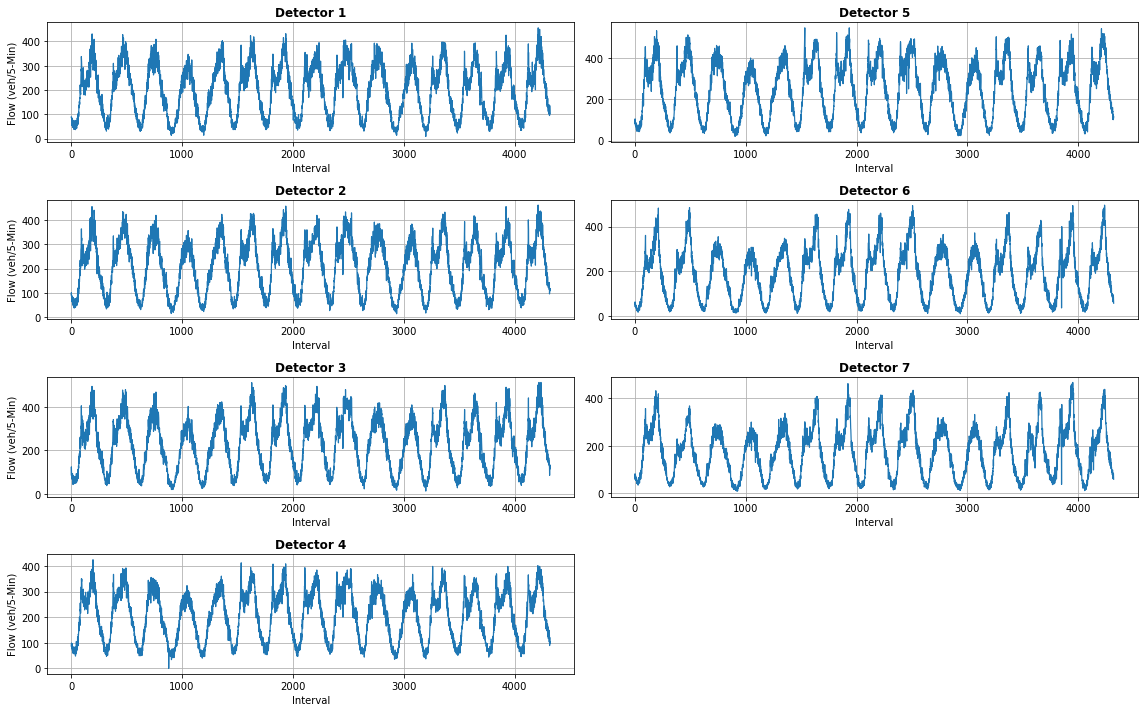

In [23]:
# plot data

# map timestamp to a variable x
x = np.linspace(0,4320,4320)

fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(16,10))

axes[0,0].plot(x,Ext['f1'], lw=1.2)
axes[1,0].plot(x,Ext['f2'], lw=1.2)
axes[2,0].plot(x,Ext['f3'], lw=1.2)
axes[3,0].plot(x,Ext['f4'], lw=1.2)
axes[0,1].plot(x,Ext['f5'], lw=1.2)
axes[1,1].plot(x,Ext['f6'], lw=1.2)
axes[2,1].plot(x,Ext['f7'], lw=1.2)
fig.delaxes(axes[3,1])


c = 0;
for b in range(0,2):
    for a in range(0,4):
        c += 1
        if b == 1 and a == 3:
            pass
        else:
            axes[a,b].set_xlabel('Interval')
            axes[a,b].set_title('Detector '+str(c) ,fontweight ="bold")
            axes[a,b].grid()
            if b == 0:
                axes[a,b].set_ylabel('Flow (veh/5-Min)')

plt.tight_layout()
plt.show()

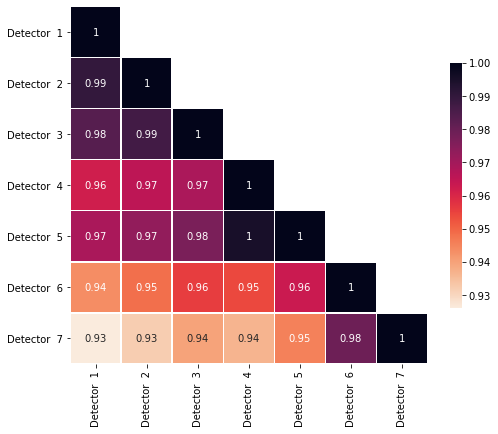

In [24]:
# The above as a plot

corr = Ext.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

labels = ['Detector  1','Detector  2','Detector  3','Detector  4','Detector  5',
          'Detector  6','Detector  7']
crr.set_yticklabels(labels, rotation=0);
crr.set_xticklabels(labels, rotation=90);

### Check for missing values

In [25]:
Ext.isnull().any()

f1     True
f2     True
f3     True
f4    False
f5     True
f6     True
f7    False
dtype: bool

In [26]:
Ext.isnull().sum().sum()

5

In [27]:
# Use interpolation to fill in Missing Completely random (MCR) nan values
Ext.interpolate(inplace = True)

In [28]:
Ext.isnull().any()

f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
f7    False
dtype: bool

### Check for missing values

In [29]:
myser1 = pd.to_datetime(Ext.index)

In [30]:
type(myser1)

pandas.core.indexes.datetimes.DatetimeIndex

In [31]:
# Create a date range for the specified interval using 5min fequency (as per the dataset)
date_range = pd.date_range('2019-02-14 00:00', '2019-02-28 23:59', freq='5Min')

In [32]:
myser = pd.Series(data=date_range)

# check if date range is in TrainVal timestamp and output the missing timestamps
myser[~myser.isin(myser1)]

Series([], dtype: datetime64[ns])

In [33]:
len(myser[~myser.isin(myser1)])

0

# Scale Data

In [34]:
import joblib

In [35]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [36]:
Ext_scaled = scaler.transform(Ext)

In [37]:
Ext_scaled.shape

(4320, 7)

In [38]:
Ext_scaled

array([[0.16703786, 0.14777328, 0.14716981, ..., 0.11492281, 0.08901515,
        0.13043478],
       [0.16258352, 0.1659919 , 0.21698113, ..., 0.14408233, 0.10227273,
        0.16521739],
       [0.16481069, 0.13765182, 0.16226415, ..., 0.1509434 , 0.10984848,
        0.16304348],
       ...,
       [0.22048998, 0.18016194, 0.21509434, ..., 0.16295026, 0.15340909,
        0.1673913 ],
       [0.21380846, 0.19433198, 0.23396226, ..., 0.15608919, 0.12121212,
        0.14782609],
       [0.19599109, 0.20040486, 0.2       , ..., 0.16981132, 0.09848485,
        0.11521739]])

# Save Data

In [39]:
scaler_filename = "Extension.save"
joblib.dump(Ext_scaled, scaler_filename) 

['Extension.save']